<a href="https://colab.research.google.com/github/Joselu04/Estad-stica_1/blob/main/PRACTICA_PARCIAL_I_ESTADISTICA_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Parcial I - Estadística II

## Análisis del Rendimiento Académico y su Relación con el Nivel Socioeconómico

---

**Autores:**

Yerly Patricia Gelves Navarro - 2211970  

José Luis Sanabria Camargo - 2203034  

Lizeth Rocio Valero Hernandez - 2221090

**Fecha:** 21 Octubre 2024

---

### Universidad Industrial de Santander




## Introducción

El presente trabajo corresponde a la Práctica Parcial I de Estadística II, en el cual se analizan las posibles influencias del rendimiento académico en diversas áreas de conocimiento sobre el nivel socioeconómico de los estudiantes. El análisis se enfoca en las puntuaciones obtenidas en **Lectura Crítica, Matemáticas, Ciencias Naturales, Ciencias Sociales y Ciudadanas, e Inglés**, con el fin de determinar si los resultados académicos están relacionados con el índice socioeconómico del evaluado. A través de métodos estadísticos como la **regresión lineal** y el **análisis de correlación**, se busca identificar patrones y relaciones significativas entre estas variables.

El objetivo principal de este ejercicio es brindar una comprensión más profunda acerca de cómo el rendimiento en distintas áreas puede estar vinculado con el contexto socioeconómico de los estudiantes. Para ello, se emplean herramientas estadísticas que permiten un análisis cuantitativo riguroso. Las tablas y gráficos generados facilitan la interpretación de la distribución de los datos y destacan tendencias relevantes que podrían aportar información valiosa para la mejora de las estrategias educativas.

Este análisis resulta clave para la toma de decisiones en el ámbito académico, ya que permite identificar áreas de oportunidad y diseñar intervenciones basadas en evidencia, con el fin de mejorar el éxito académico de los estudiantes.


In [11]:
# BIBLIOTECAS A UTILIZAR

import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import spearmanr, kendalltau
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor

In [12]:
# PARA CARGAR LA BASE DE DATOS DIRECTAMENTE A GOOGLE COLAB

from google.colab import files
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231 (3).TXT


In [14]:
# PARA QUE EL LA BASE DE DATOS SEA CARGADA COMO ARCHIVO CSV PREVIAMENTE SE REQUIERE :
# import io
# import pandas as pd

datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231 (3).TXT']),
delimiter='¬')
datos_icfes.head(4)

<ipython-input-14-694d618461d5>:5: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231 (3).TXT']),


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


In [15]:
# INFORMACIÓN SOBRE VARIABLES
datos_icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             12704 non-null  object 
 1   ESTU_NACIONALIDAD              12704 non-null  object 
 2   ESTU_GENERO                    12704 non-null  object 
 3   ESTU_FECHANACIMIENTO           12704 non-null  object 
 4   PERIODO                        12704 non-null  int64  
 5   ESTU_CONSECUTIVO               12704 non-null  object 
 6   ESTU_ESTUDIANTE                12704 non-null  object 
 7   ESTU_PAIS_RESIDE               12704 non-null  object 
 8   ESTU_DEPTO_RESIDE              12704 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          12704 non-null  int64  
 10  ESTU_MCPIO_RESIDE              12704 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          12704 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        12702 non-null 

In [16]:
# NOMBRE COLUMNAS
datos_icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

In [17]:
# ELIMINACION DE VALORES FALTANTES EN datos_icfes
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna())&(~datos_icfes['PUNT_LECTURA_CRITICA'].isna())&(~datos_icfes['PUNT_MATEMATICAS'].isna())&(~datos_icfes['PUNT_C_NATURALES'].isna())&(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna())&(~datos_icfes['PUNT_INGLES'].isna())]
#icfes_sin_nan.head(4)

**VAMOS A REALIZAR EL MODELO DE REGRESIÓN LINEAL.**

In [18]:
tabla_regresion = icfes_sin_nan[["ESTU_INSE_INDIVIDUAL", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",
"PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES" ]]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0


**VAMOS A IDENTIFIAR LOS VALOR NO REPRESENTATIVOS DE CADA UNA DE LAS VARIABLES EN: tabla_regresion USANDO HISTOGRAMAS DE LAS MISMAS**

<Axes: >

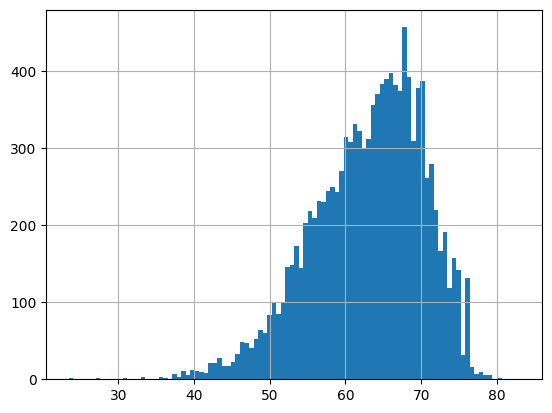

In [19]:
tabla_regresion["ESTU_INSE_INDIVIDUAL"].hist(bins = 100)

Los valores no representativos de la variable "ESTU_INSE_INDIVIDUAL" son los > 80

<Axes: >

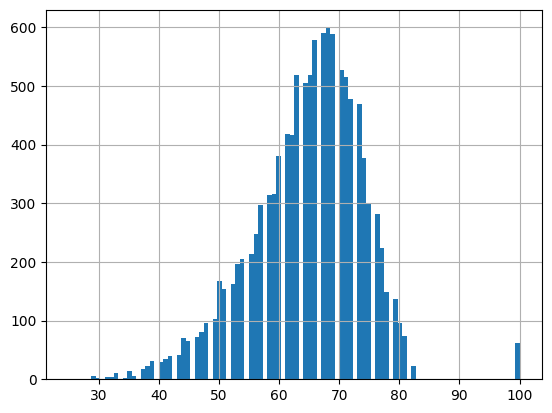

In [20]:
tabla_regresion["PUNT_LECTURA_CRITICA"].hist(bins = 100)

Los valores no representativos de la variable "PUNT_LECTURA_CRITICA" son los > 85

<Axes: >

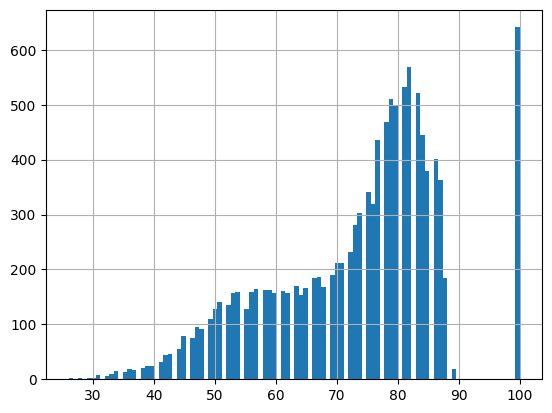

In [21]:
tabla_regresion["PUNT_INGLES"].hist(bins = 100)

Los valores no representativos de la variable "PUNT_INGLES" son los > 90

<Axes: >

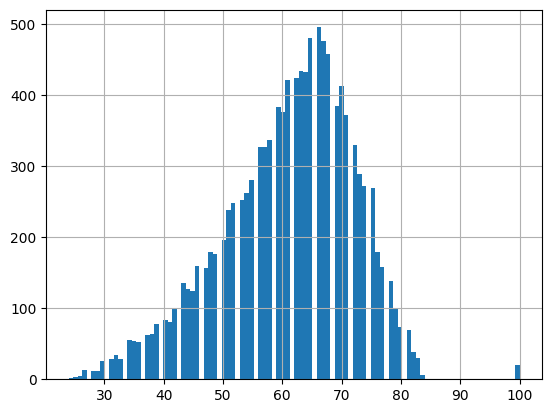

In [22]:
tabla_regresion["PUNT_SOCIALES_CIUDADANAS"].hist(bins = 100)

Los valores no representativos de la variable "PUNT_SOCIALES_CIUDADANAS" son los > 85


<Axes: >

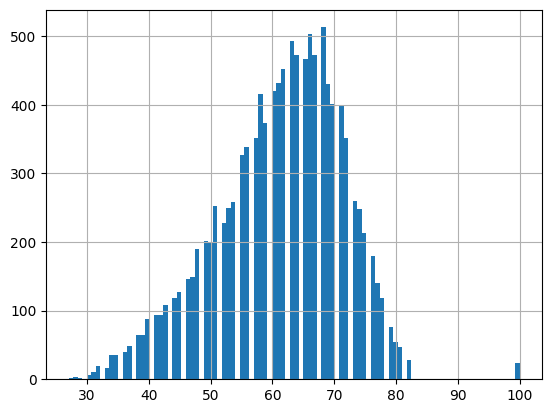

In [23]:
tabla_regresion["PUNT_C_NATURALES"].hist(bins = 100)

Los valores no representativos de la variable "PUNT_C_NATURALES" son los > 85

<Axes: >

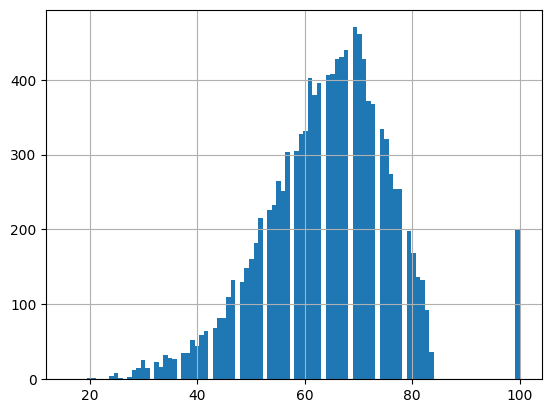

In [24]:
tabla_regresion["PUNT_MATEMATICAS"].hist(bins = 100)

Los valores no representativos de la variable "PUNT_MATEMATICAS" son los > 85

**ELEMENTO CON EL CUAL VAMOS A ENTRENAR NUESTRO MODELO: tabla_regresion1 EN EL CUAL SE EXCLUYERON LOS VALORES NO REPRESENTATIVOS DE: tabla_regresion**

In [25]:
tabla_regresion1 = tabla_regresion[(tabla_regresion["ESTU_INSE_INDIVIDUAL"] < 80) & (tabla_regresion["PUNT_LECTURA_CRITICA"] < 90) & (tabla_regresion["PUNT_INGLES"] < 90) & (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] < 90) & (tabla_regresion["PUNT_C_NATURALES"] < 90) & (tabla_regresion["PUNT_MATEMATICAS"] < 90)  ]
tabla_regresion1.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0


 **DIAGRAMAS DE DISPERSIÓN CONSIDERANDO TODOS LOS DATOS Y VARIABLES EN: tabla_regresion1 PARA VER QUE VARIABLES SON EXPLICATIVAS Y CUALES NO**

In [26]:
modelo = LinearRegression()
# tabla_regresion1["PUNT_MATEMATICAS"] es igual a escribir tabla_regresion1.PUNT_MATEMATICAS
modelo.fit(np.array(tabla_regresion1.PUNT_MATEMATICAS).reshape(-1, 1), np.array(tabla_regresion1["ESTU_INSE_INDIVIDUAL"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(tabla_regresion1.PUNT_MATEMATICAS).reshape(-1, 1))
#predi_lineal

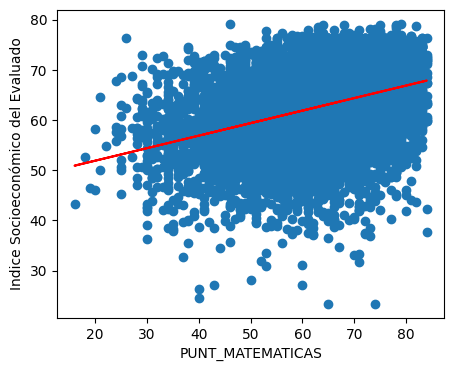

In [27]:
plt.figure (figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(tabla_regresion1["PUNT_MATEMATICAS"], predi_lineal, linestyle='-', color = "red")
plt.xlabel("PUNT_MATEMATICAS")
plt.ylabel("Indice Socioeconómico del Evaluado")
plt.show()

Hay una relación positiva entre las variables, pero debil.

In [28]:
modelo = LinearRegression()
# tabla_regresion1["PUNT_MATEMATICAS"] es igual a escribir tabla_regresion1.PUNT_MATEMATICAS
modelo.fit(np.array(tabla_regresion1.PUNT_LECTURA_CRITICA).reshape(-1, 1), np.array(tabla_regresion1["ESTU_INSE_INDIVIDUAL"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(tabla_regresion1.PUNT_LECTURA_CRITICA).reshape(-1, 1))
#predi_lineal

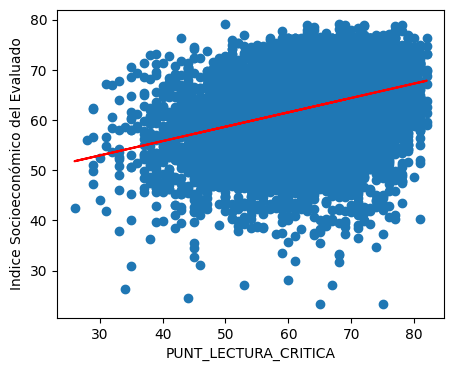

In [29]:
plt.figure (figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(tabla_regresion1["PUNT_LECTURA_CRITICA"], predi_lineal, linestyle='-', color = "red")
plt.xlabel("PUNT_LECTURA_CRITICA")
plt.ylabel("Indice Socioeconómico del Evaluado")
plt.show()

Hay una relación positiva entre las variables, pero debil.

In [30]:
modelo = LinearRegression()
# tabla_regresion1["PUNT_MATEMATICAS"] es igual a escribir tabla_regresion1.PUNT_MATEMATICAS
modelo.fit(np.array(tabla_regresion1.PUNT_C_NATURALES).reshape(-1, 1), np.array(tabla_regresion1["ESTU_INSE_INDIVIDUAL"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(tabla_regresion1.PUNT_C_NATURALES).reshape(-1, 1))


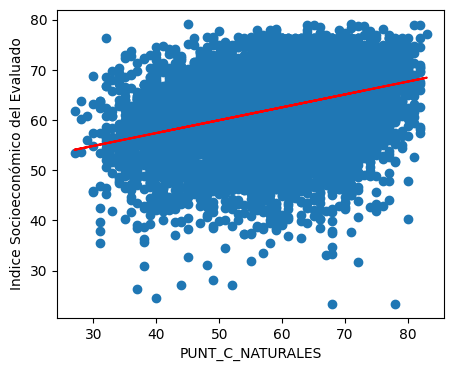

In [31]:
plt.figure (figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(tabla_regresion1["PUNT_C_NATURALES"], predi_lineal, linestyle='-', color = "red")
plt.xlabel("PUNT_C_NATURALES")
plt.ylabel("Indice Socioeconómico del Evaluado")
plt.show()

Hay una relación positiva entre las variables, pero debil.

In [32]:
modelo = LinearRegression()
# tabla_regresion1["PUNT_MATEMATICAS"] es igual a escribir tabla_regresion1.PUNT_MATEMATICAS
modelo.fit(np.array(tabla_regresion1.PUNT_SOCIALES_CIUDADANAS).reshape(-1, 1), np.array(tabla_regresion1["ESTU_INSE_INDIVIDUAL"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(tabla_regresion1.PUNT_SOCIALES_CIUDADANAS).reshape(-1, 1))
#predi_lineal

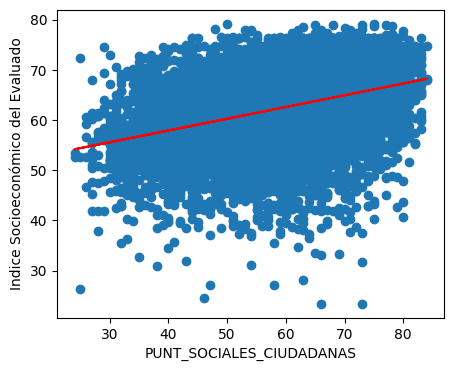

In [33]:
plt.figure (figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], predi_lineal, linestyle='-', color = "red")
plt.xlabel("PUNT_SOCIALES_CIUDADANAS")
plt.ylabel("Indice Socioeconómico del Evaluado")
plt.show()

Hay una relación positiva entre las variables, pero debil.

In [34]:
modelo = LinearRegression()
# tabla_regresion1["PUNT_MATEMATICAS"] es igual a escribir tabla_regresion1.PUNT_MATEMATICAS
modelo.fit(np.array(tabla_regresion1.PUNT_INGLES).reshape(-1, 1), np.array(tabla_regresion1["ESTU_INSE_INDIVIDUAL"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(tabla_regresion1.PUNT_INGLES).reshape(-1, 1))
#predi_lineal

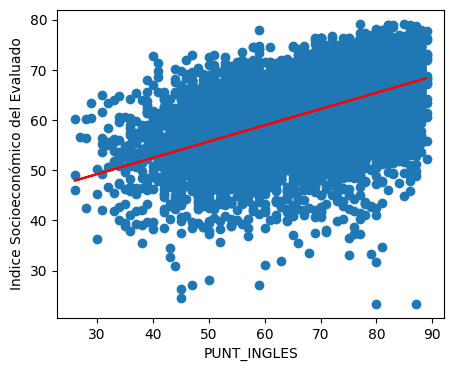

In [35]:
plt.figure (figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(tabla_regresion1["PUNT_INGLES"], predi_lineal, linestyle='-', color = "red")
plt.xlabel("PUNT_INGLES")
plt.ylabel("Indice Socioeconómico del Evaluado")
plt.show()

Hay una relación positiva entre las variables, pero fuerte.

 COEFICIENTES DE CORRELACIÓN DE PEARSON DE KENDALL Y SPEARMAN.

 Para la interpretación de los coeficientes de correlación nos ayudaremos de la referencia: \\
[Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174.](https://www.jstor.org/stable/2529310) \\



* X y Y son independientes o no estan correlacionadas si \\
 $ ρ(X, Y) ≈ 0, \eta(X, Y) ≈ 0, κ(X, Y) ≈ 0 $.
* Y depende insignificantemente de X o X y Y estan insugnificantemente correlacionadas si \\
 $ 0 < |ρ(X, Y)| < 0.2, 0 < |\eta(X, Y)| < 0.2 $ .
* Y depende discretamente de X o X y Y estan discretamente correlacionadas si \\
 $ 0.2 < |ρ(X, Y)| < 0.4, 0.2 < |\eta(X, Y)| < 0.4$
* Y depende moderadamente de X o X y Y estan moderadamente correlacionadas si \\
 $ 0.4 < |ρ(X, Y)| < 0.6, 0.4 < |\eta(X, Y)| < 0.6, 0.4 < |κ(X, Y)| < 0.6$
* Y depende sustancialmente de X o X y Y estan sustancialmente correlacionadas si \\
 $ 0.6 < |ρ(X, Y)| < 0.8, 0.6 < |\eta(X, Y)| < 0.8, 0.6 < |κ(X, Y)| < 0.8$
*  Y depende fuertemente de X o X y Y estan fuertemente correlacionadas si \\
$ 0.8 < |ρ(X, Y)| < 1, 0.8 < |\eta(X, Y)| < 1, 0.8 < |κ(X, Y)| < 1$



In [36]:
coef_pearson1 = np.corrcoef(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman1, _ = spearmanr(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall1, _ = kendalltau(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson1}, {coef_spearman1} y {coef_kendall1}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3649673865749042, 0.3750105430778031 y 0.25814080098666364.


"PUNT_MATEMATICAS" y "ESTU_INSE_INDIVIDUAL" estan discretamente correlacionadas

In [37]:
coef_pearson2 = np.corrcoef(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman2, _ = spearmanr(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall2, _ = kendalltau(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson2}, {coef_spearman2} y {coef_kendall2}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.33857044909591394, 0.3373656579865642 y 0.23225254879612614.


"PUNT_LECTURA_CRITICA" y "ESTU_INSE_INDIVIDUAL" estan discretamente correlacionadas

In [38]:
coef_pearson3 = np.corrcoef(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman3, _ = spearmanr(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall3, _ = kendalltau(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson3}, {coef_spearman3} y {coef_kendall3}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.34139302056890697, 0.3446226619726169 y 0.23656151273109868.


"PUNT_C_NATURALES" y "ESTU_INSE_INDIVIDUAL" estan discretamente correlacionadas

In [39]:
coef_pearson4 = np.corrcoef(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman4, _ = spearmanr(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall4, _ = kendalltau(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson4}, {coef_spearman4} y {coef_kendall4}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3393012234371317, 0.3421454732968409 y 0.23503396495844753.


"PUNT_SOCIALES_CIUDADANAS" y "ESTU_INSE_INDIVIDUAL" estan discretamente correlacionadas

In [40]:
coef_pearson5 = np.corrcoef(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman5, _ = spearmanr(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall5, _ = kendalltau(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson5}, {coef_spearman5} y {coef_kendall5}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5541479838549712, 0.5642212608622533 y 0.39424810496347445.


"PUNT_INGLES" y "ESTU_INSE_INDIVIDUAL" estan moderadamente correlacionadas

IMPLEMENTACIÓN DEL MODELO DE REGRESIÓN LINEAL MULTIPLE



Debemos escojer un conjunto de datos de entrenamiento y otro de validación lo cual hace la diferencia entre un modelo implementado con estadistica basica y otro con aprendizaje de maquina. \\

**Los datos de entrenamiento son:** Con los que se entrena el modelo. Es decir, son aquellos datos con los que se estiman los parametros. \\
**Los datos de validación son:** Datos con los cuales de determina si el modelo tiene un buen ajuste o no.

In [41]:
# DATOS DE ENTRENAMIENTO Y DATOS DE VALIDACIÓN

X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)    # 80% datos de entrenamiento 20% datos de validación

# PREDICCIÓN MODELO LINEAL

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)

# COEFICIENTE DE DETERMINACIÓN
# Se usa para determinar que tan bueno es el modelo o que tan bien se esta ajustando el mismo.

r2_lineal = regresion.score(testX, testY)


r2_lineal
trainX.head(4)
trainY.head(4)

,ESTU_INSE_INDIVIDUAL
12545,57.611606
10887,76.341981
6215,50.717793
5182,65.790361


* COEFICIENTES DE DETERMINACIÓN

In [42]:
# COEFICIENTE DE DETERMINACION SIN "PUNT_LECTURA_CRITICA"

X1 = tabla_regresion1[[ "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES"  ]]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)

# PREDICCIÓN MODELO LINEAL

modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)

# COEFICIENTE DE DETERMINACIÓN

r2_lineal1 = regresion1.score(test1X, test1Y)

r2_lineal1
#train1X.head(4)

0.2947540211982348

In [43]:
# COEFICIENTE DE DETERMINACION SIN "PUNT_MATEMATICAS"

X2 = tabla_regresion1[[ "PUNT_LECTURA_CRITICA", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES"  ]]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

# PREDICCIÓN MODELO LINEAL

modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
pred_lineal2 = regresion2.predict(test2X)

# COEFICIENTE DE DETERMINACION

r2_lineal2 = regresion2.score(test2X, test2Y)


r2_lineal2
#train1X.head(4)

0.29483912553842895

In [44]:
# COEFICIENTE DE DETERMINACION SIN "PUNT_C_NATURALES"

X3 = tabla_regresion1[[ "PUNT_LECTURA_CRITICA", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_MATEMATICAS"  ]]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)

# PREDICCIÓN MODELO LINEAL

modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
pred_lineal3 = regresion3.predict(test3X)

# COEFICIENTE DE DETERMINACION

r2_lineal3 = regresion3.score(test3X, test3Y)

r2_lineal3
#train3X.head(4)

0.2959371782929858

In [45]:
# COEFICIENTE DE DETERMINACION SIN "PUNT_SOCIALES_CIUDADANAS"

X4 = tabla_regresion1[[ "PUNT_LECTURA_CRITICA", "PUNT_C_NATURALES", "PUNT_INGLES", "PUNT_MATEMATICAS"  ]]
Y4 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train4X, test4X, train4Y, test4Y = train_test_split(X4, Y4, test_size = 0.2, random_state = 0)

# PREDICCIÓN MODELO LINEAL

modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal3.fit(train4X, train4Y)
pred_lineal4 = regresion3.predict(test4X)

# COEFICIENTE DE DETERMINACION

r2_lineal4 = regresion4.score(test4X, test4Y)

r2_lineal4
#train4X.head(4)

0.2961694957558495

In [46]:
# COEFICIENTE DE DETERMINACION SIN "PUNT_INGLES"

X5 = tabla_regresion1[[ "PUNT_LECTURA_CRITICA", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_MATEMATICAS"  ]]
Y5 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train5X, test5X, train5Y, test5Y = train_test_split(X5, Y5, test_size = 0.2, random_state = 0)

# PREDICCIÓN MODELO LINEAL

modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(train5X, train5Y)
pred_lineal5 = regresion5.predict(test5X)

# COEFICIENTE DE DETERMINACION

r2_lineal5 = regresion5.score(test5X, test5Y)

r2_lineal5
#train5X.head(4)

0.13362998486245825

El coeficiente de determinacion sin "PUNT_INGLES" es de 0.13362998486245825 y con "PUNT_INGLES" 0.2962348737142402, por lo que "PUNT_INGLES" es una variable explicativa.

DIAGRAMA DE DISPERSIÓN CON RECTA DE REGRESIÓN, RESPECTO A DOS VARIABLES, USANDO DATOS DE ENTRENAMIENTO Y VALIDACIÓN

In [47]:
x = np.array(tabla_regresion1["PUNT_MATEMATICAS"]).reshape(-1, 1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)


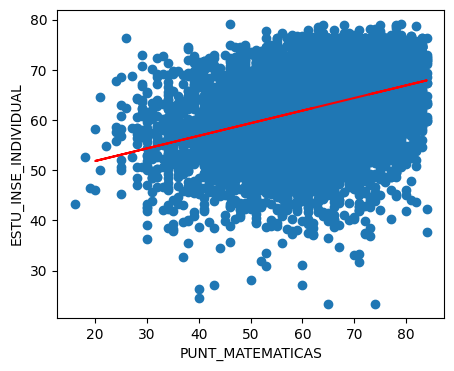

In [48]:
plt.figure(figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_MATEMATICAS"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(testx, pred_lineal, linestyle = '-', color = "red")
plt.xlabel("PUNT_MATEMATICAS")
plt.ylabel("ESTU_INSE_INDIVIDUAL")
plt.show()

In [49]:
x = np.array(tabla_regresion1["PUNT_LECTURA_CRITICA"]).reshape(-1, 1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

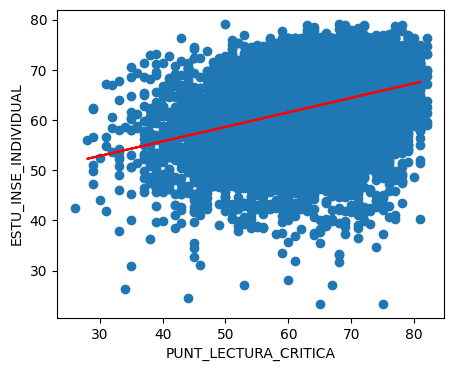

In [50]:
plt.figure(figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_LECTURA_CRITICA"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.xlabel("PUNT_LECTURA_CRITICA")
plt.ylabel("ESTU_INSE_INDIVIDUAL")
plt.plot(testx, pred_lineal, linestyle = '-', color = 'red')
plt.show()

In [51]:
x = np.array(tabla_regresion1["PUNT_C_NATURALES"]).reshape(-1, 1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

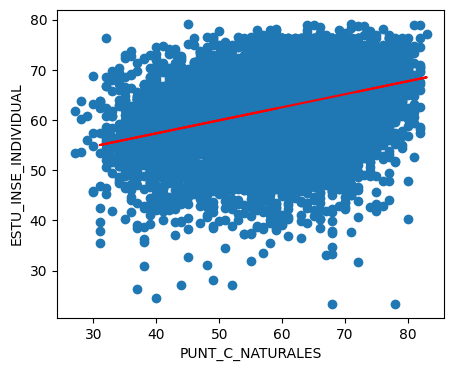

In [52]:
plt.figure(figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_C_NATURALES"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(testx, pred_lineal, linestyle = '-', color = 'red')
plt.xlabel("PUNT_C_NATURALES")
plt.ylabel("ESTU_INSE_INDIVIDUAL")
plt.show()

In [53]:
x = np.array(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"]).reshape(-1, 1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

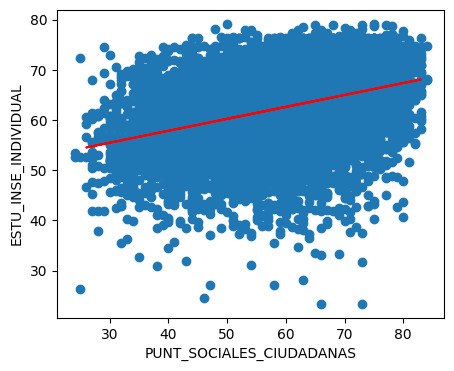

In [54]:
plt.figure(figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(testx, pred_lineal, linestyle = '-', color = 'red')
plt.xlabel("PUNT_SOCIALES_CIUDADANAS")
plt.ylabel("ESTU_INSE_INDIVIDUAL")
plt.show()

In [55]:
x = np.array(tabla_regresion1["PUNT_INGLES"]).reshape(-1, 1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

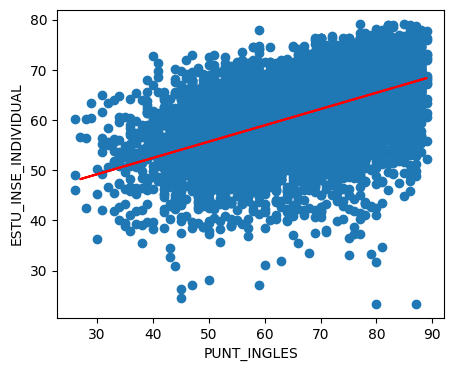

In [56]:
plt.figure(figsize = (5, 4))
plt.scatter(tabla_regresion1["PUNT_INGLES"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(testx, pred_lineal, linestyle = '-', color = 'red')
plt.xlabel("PUNT_INGLES")
plt.ylabel("ESTU_INSE_INDIVIDUAL")
plt.show()

RED NEURONAL

In [57]:
XY, Z = tabla_regresion1[["PUNT_INGLES", "PUNT_MATEMATICAS"]], tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)

,PUNT_INGLES,PUNT_MATEMATICAS
12545,68.0,58
10887,82.0,55
6215,69.0,64
5182,88.0,74


In [58]:
modelo1 = LinearRegression()
# Entrenamos el modelo
modelo1.fit(trainXY, trainZ)

LinearRegression()

In [59]:
modelo1.score(testXY, testZ) # Observe que aun sin considerar la otras variables el coeficiente de determinacion, sigue siendo el mismo. 0.2962348737142402
                             # Por lo que se puede decir que las unicas variables importantes, son "PUNT_INGLES", "PUNT_MATEMATICAS"

0.2935166867103943

In [60]:
array = modelo1.coef_
array

# array([interscepto, pendiente])

array([0.31380449, 0.020509  ])

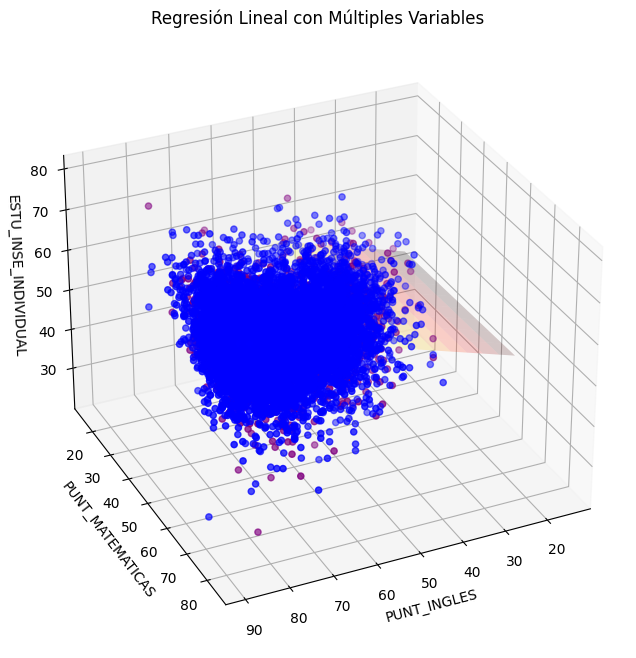

In [61]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_INGLES"], trainXY["PUNT_MATEMATICAS"], trainZ, c='blue',s=20)
ax.scatter(testXY["PUNT_INGLES"], testXY["PUNT_MATEMATICAS"], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel("PUNT_INGLES")
ax.set_ylabel("PUNT_MATEMATICAS")
ax.set_zlabel("ESTU_INSE_INDIVIDUAL")
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

* RED NEURONAL MULRICAPA AHORA SI

In [62]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [63]:
# COEFICIENTE DE DETERMINACIÓN DE ESTE MODELO

#mlp_reg.score(testX, testY)   #OBSERVE QUE NO SE OBSERVA MEJOR AJUSTE ASI, QUE AUMENTAREMOS LAS CAPAZ EN mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10)

In [64]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [65]:
 # COEFICIENTE DE DETERMINACIÓN DE ESTE MODELO

red.score(testX, testY)

0.12866819614395153

In [66]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [67]:
no_obs = np.array([[45, 41, 41, 27, 58.0]])
print('Se espera que el ESTU_INSE_INDIVIDUAL', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el ESTU_INSE_INDIVIDUAL [57.86979761] bajo el perceptrón multicapa y  [58.21127921] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [69]:
coef_pearson1 = np.corrcoef(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman1, _ = spearmanr(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall1, _ = kendalltau(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson1}, {coef_spearman1} y {coef_kendall1}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3649673865749042, 0.3750105430778031 y 0.25814080098666364.


In [70]:
coef_pearson5 = np.corrcoef(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
coef_spearman5, _ = spearmanr(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
coef_kendall5, _ = kendalltau(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson5}, {coef_spearman5} y {coef_kendall5}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5541479838549712, 0.5642212608622533 y 0.39424810496347445.


PERCEPTRON MULTICAPA

In [71]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
                                       max_iter = 500,
                                       activation = 'relu',
                                       solver = 'adam',
                                       learning_rate = 'invscaling')
red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [72]:
tabla_regresion2 = tabla_regresion[(tabla_regresion["ESTU_INSE_INDIVIDUAL"] > 80) & (tabla_regresion["PUNT_LECTURA_CRITICA"] < 100) & (tabla_regresion["PUNT_INGLES"] < 100) & (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] < 100) & (tabla_regresion["PUNT_C_NATURALES"] < 100) & (tabla_regresion["PUNT_MATEMATICAS"] < 100)  ]
tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,83.007321,75,64,71,59,83.0
8910,80.453570,61,68,67,50,78.0
10650,80.453570,68,68,58,66,87.0


In [73]:
X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
mlp_reg.predict(X_no)

array([66.34522239, 62.91943477, 67.09905867])

In [74]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = mlp_reg.predict(X_no)
tabla_regresion2

<ipython-input-74-8e493871afec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = mlp_reg.predict(X_no)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,66.345222,75,64,71,59,83.0
8910,62.919435,61,68,67,50,78.0
10650,67.099059,68,68,58,66,87.0


## Conclusiones

1. **Relación significativa entre puntajes en Inglés y Matemáticas con el nivel socioeconómico**:  
   Se observó una **correlación positiva** clara entre los puntajes obtenidos en las áreas de **Inglés** y **Matemáticas** y el **nivel socioeconómico** de los estudiantes. Esto indica que los estudiantes con mejores resultados en estas áreas tienden a provenir de contextos socioeconómicos más altos. Este hallazgo sugiere que ciertos factores asociados con el nivel socioeconómico, como el acceso a mejores recursos educativos, podrían influir positivamente en el rendimiento en estas áreas.

2. **Menor influencia de otras áreas**:  
   En contraste, el rendimiento en otras áreas evaluadas, como **Ciencias Naturales**, **Lectura Crítica**, y **Ciencias Sociales y Ciudadanas**, no mostró una relación significativa con el nivel socioeconómico. Esto sugiere que, en estas áreas, el rendimiento académico podría depender menos del contexto socioeconómico y más de otros factores, como la metodología de enseñanza o el interés personal de los estudiantes.

3. **Implicaciones educativas**:  
   Estos resultados subrayan la importancia de considerar el **contexto socioeconómico** en el diseño de políticas educativas, particularmente en áreas como Inglés y Matemáticas. Las instituciones educativas podrían implementar **programas de apoyo específicos** para los estudiantes de bajos niveles socioeconómicos en estas áreas, donde las diferencias parecen ser más pronunciadas, para reducir la brecha de rendimiento.

4. **Desigualdad de acceso a recursos educativos**:  
   La correlación observada entre el rendimiento en Inglés y Matemáticas y el nivel socioeconómico podría ser un reflejo de la **desigualdad en el acceso a recursos** (como clases adicionales, libros, acceso a tecnología o apoyo extracurricular), lo que sugiere la necesidad de políticas educativas orientadas a proporcionar igualdad de oportunidades en todas las áreas.
